In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pathlib import Path
path = Path('../datos')
house = pd.read_csv(path / 'house.csv')
house.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [2]:
#Ejercicio 1

In [ ]:
'''
Implementa el código necesario para:
- Añadir una nueva columna al df con nombre price_grp. Esta columna tendrá valores entre 0 y 5, siendo 0 el 20% de fila con el precio más 
barato y 5, el 20% de casas con el precio más caro.
- Comprobar si hay valores missing, si es así sustituir por otro valor.
- ¿Cuál es el precio medio de las casas?
'''

In [16]:
house['price_grp'] = pd.qcut(house['price'], q = 5, labels=np.arange(5))
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [17]:
house['price_grp'].isna().sum()

np.int64(0)

In [20]:
mean = house['price'].mean()
round(mean,2)

np.float64(551962.99)

In [21]:
#Ejercio 2

In [ ]:
'''
Genera un dataframe que contenga el número medio de baños y plantas por cada valor de condition.
Genera otro dataframe con el precio min y max (mayores que 0) por cada valor de condition
Une ambos dataframes para tener uno con toda la info
'''

In [134]:
g1 = house.groupby('condition').agg({
    'bathrooms':'mean',
    'floors':'mean'
})
g1

,bathrooms,floors
condition,,
1,1.166667,1.083333
2,1.437500,1.156250
3,2.276957,1.651130
4,1.935903,1.277157
5,2.107471,1.301149


In [135]:
g2 = house.query('price > 0').groupby('condition').agg({
    'price': ['min','max']
})
g2

price            
               min         max
condition                     
1           7800.0    550000.0
2          80000.0   2555000.0
3          83000.0  12899000.0
4          83300.0  26590000.0
5          83300.0   3200000.0

In [136]:
g2 = g2.stack(level=0)
g2

,,min,max
condition,,,
1,price,7800.0,550000.0
2,price,80000.0,2555000.0
3,price,83000.0,12899000.0
4,price,83300.0,26590000.0
5,price,83300.0,3200000.0


In [131]:
gt = g1.merge(g2, how='right', left_on='condition', right_on='condition', )
gt

,bathrooms,floors,min,max
condition,,,,
1,1.166667,1.083333,7800.0,550000.0
2,1.437500,1.156250,80000.0,2555000.0
3,2.276957,1.651130,83000.0,12899000.0
4,1.935903,1.277157,83300.0,26590000.0
5,2.107471,1.301149,83300.0,3200000.0


In [138]:
#Ejercicio 3

In [ ]:
'''
Genera una pivot table que muestre el precio medio por planta y condición, es decir, debe mostrar infomación del tipo:
- Las casas con 1 planta y condicion 1 tienen de media un precio de 282560€
- Las casas con 2 plantas y condición 3 tienen de media un precio de 622919€
Rellena los valores missing con 0
Por último, representar los valores de las casas de una planta en un gráfico de barras
'''

In [151]:
tabla = pd.pivot_table(data= house, index='condition', columns= 'floors', values='price', aggfunc=np.mean)
tabla

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,NaN


In [156]:
tabla.fillna(value=0, inplace=True)
tabla

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,244226.000000,304077.500000,1.019333e+06,0.000000e+00,0.000000e+00,0.0
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,0.0
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,0.0


<Axes: xlabel='condition'>

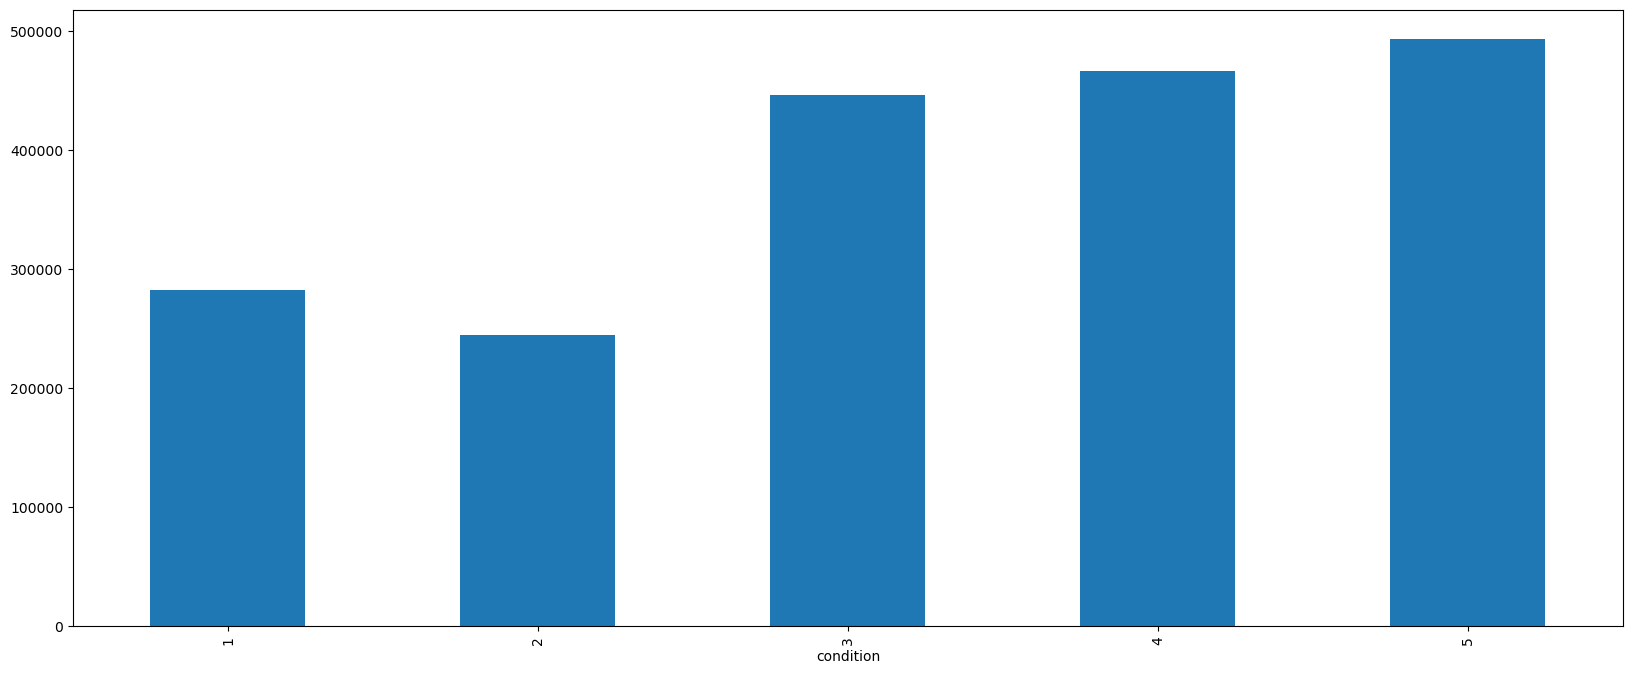

In [168]:
tabla[1.0].plot(kind='bar', figsize=(20,8))